# Full code and analysis

This notebook should serve as a guide to reproduce the analysis and figures shown in the poster and
main summary file.

The whole analysis can be performed using `Python` (<3.8) and a local installation of [HYSPLIT](https://www.ready.noaa.gov/HYSPLIT_register.php) (follow the link
for the instructions on how to get it installed). 

While the full KD registry dataset can't be shared, we will share the list of dates selected as KD Maxima
and KD Minima so that the trajectory generation can be emulated and reproduced.

## Preamble

### Imports

In [3]:
import shapely
import pysplit

import pandas as pd
import plotnine as p9
import geopandas as gpd

from shapely.geometry import Point, LineString
from mizani.formatters import percent_format, date_format, custom_format

### Pre-sets

In [36]:
p9.options.set_option('dpi', 200)
p9.options.set_option('figure_size', (4, 3))
p9.options.set_option('base_family', 'Bitstream Vera Serif')
p9.theme_set(p9.theme_bw() + p9.theme(axis_text=p9.element_text(size=7),
                                      axis_title=p9.element_text(size=9)))

## Data loading and processing

### Kawasaki Disease

#### Full Japanese temporal records

We have acces to a pre-processed file with the number of hospital admissions registered as
Kawasaki Disease cases for all of Japan starting from 1970 and up to 2018. For privacy reasons
we are not allowed to share this but since we will just use this to generate the general time
series for the whole period, it shouldn't be a big deal. 

We load a file and show a sample of 10 rows, with the date and the number of registered admissions:

In [33]:
kd_japan = (pd.read_csv('../data/kawasaki_disease/japan_ts.csv', index_col=0)
            .reset_index()
            .rename(columns={'index': 'date'})
            .assign(date=lambda dd: pd.to_datetime(dd.date))
)
kd_japan.sample(10).set_index('date')


,kd_cases
date,
1988-04-27,19
1985-11-11,38
2003-06-15,9
1973-03-12,6
2015-10-18,20
2017-07-27,35
1975-04-21,10
1999-02-06,15
1973-09-01,8


If we plot the full temporal series for the daily KD hospital admissions in all of Japan, the figure is the following:

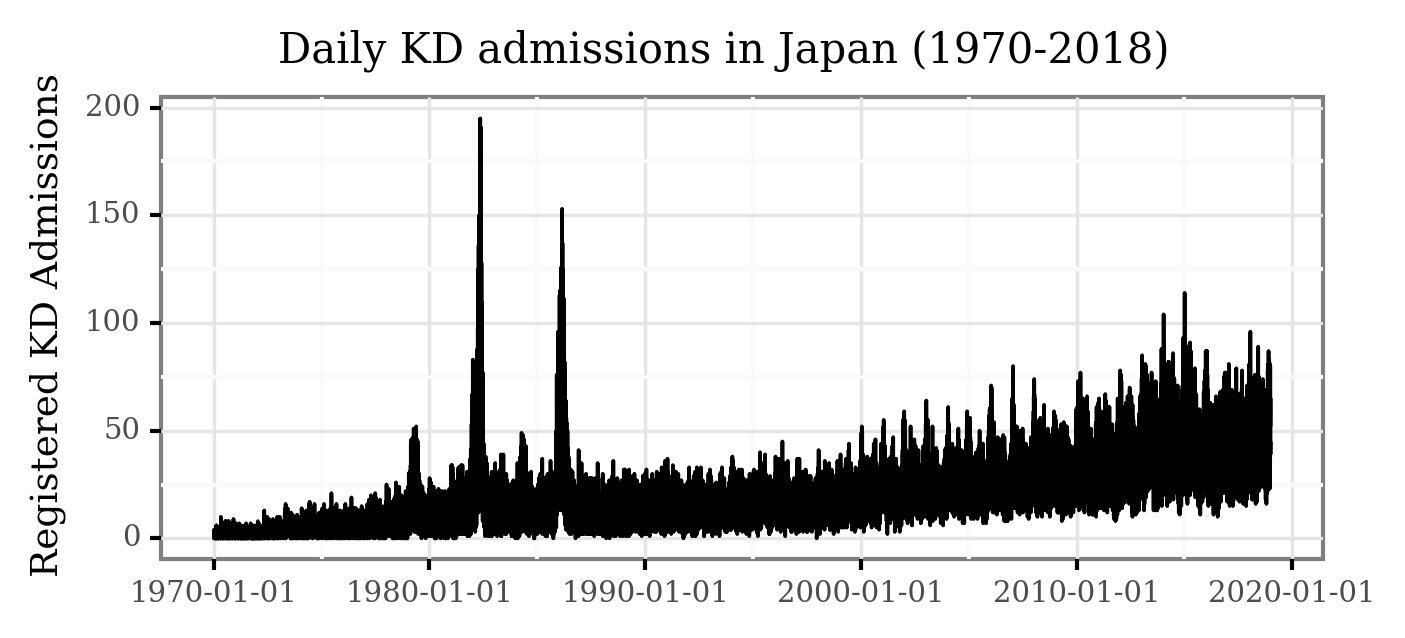

<ggplot: (8760336679940)>

In [45]:
(p9.ggplot(kd_japan)
 + p9.aes('date', 'kd_cases')
 + p9.geom_line()
 + p9.labs(x='', y='Registered KD Admissions', title='Daily KD admissions in Japan (1970-2018)')
 + p9.theme(figure_size=(5, 2),
                  dpi=300,
                  title=p9.element_text(size=10),
                  axis_title_y=p9.element_text(size=9))
)


While some of the patterns are visible here, the daily variance makes some of the temporal features hard to visualize. Let's generate the monthly averages of daily admissions and plot the figure again:

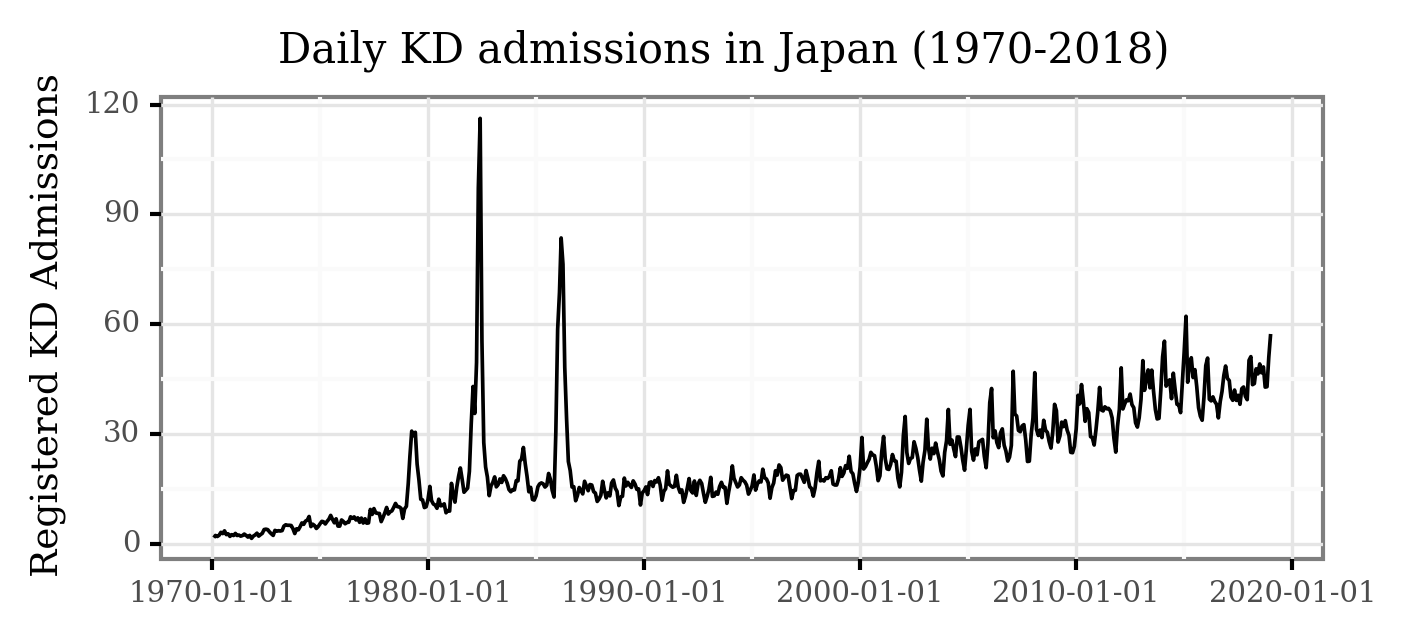

<ggplot: (8760341690929)>

In [44]:
(kd_japan
 .set_index('date')
 .resample('M')
 .mean()
 .reset_index()
 .pipe(lambda dd: p9.ggplot(dd)
 + p9.aes('date', 'kd_cases')
 + p9.geom_line()
 + p9.labs(x='', y='Registered KD Admissions',
           title='Daily KD admissions in Japan (1970-2018)')
 + p9.theme(figure_size=(5, 2),
                  dpi=300,
                  title=p9.element_text(size=10),
                  axis_title_y=p9.element_text(size=9))
)
)

 


Notice how now, 3 features are clearly visible:

+ The three _epidemic_ events during 1979, 1982 and 1986.
+ The increasing trend from 2000 on.
+ The marked periodicity (yearly seasonality) from 2000 on.

Taking a closer look to the pre-1990 period:

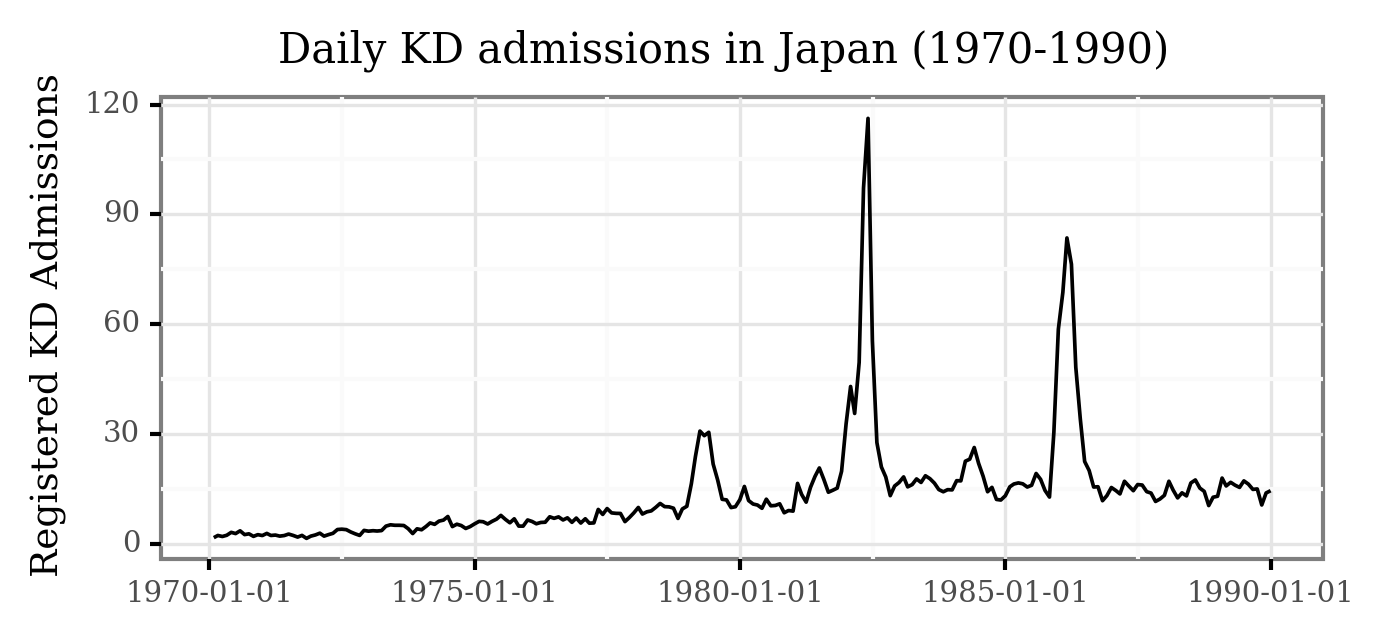

<ggplot: (8760331677437)>

In [54]:
(kd_japan
 .set_index('date')
 .resample('M')
 .mean()
 .loc[:'1990-01-01']
 .reset_index()
 .pipe(lambda dd: p9.ggplot(dd)
 + p9.aes('date', 'kd_cases')
 + p9.geom_line()
 + p9.labs(x='', y='Registered KD Admissions',
           title='Daily KD admissions in Japan (1970-1990)')
 + p9.theme(figure_size=(5, 2),
                  dpi=300,
                  title=p9.element_text(size=10),
                  axis_title_y=p9.element_text(size=9))
)
)

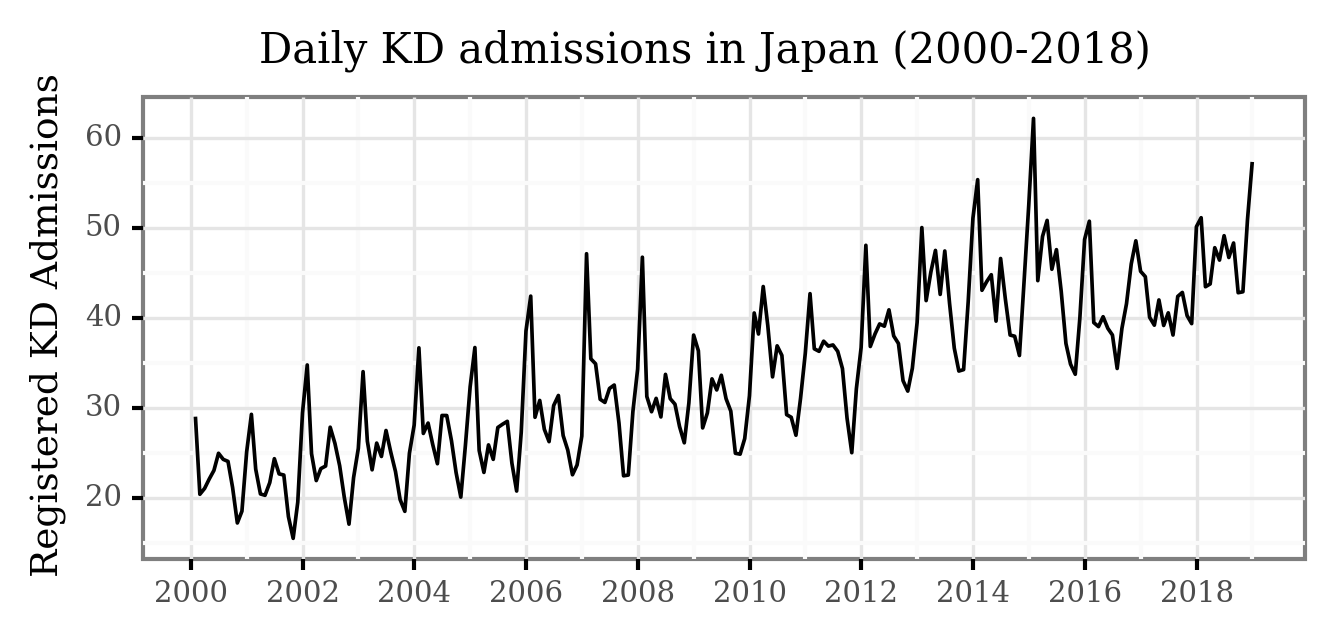

<ggplot: (8760331729415)>

In [53]:
(kd_japan
 .set_index('date')
 .resample('M')
 .mean()
 .loc['2000-01-01':]
 .reset_index()
 .pipe(lambda dd: p9.ggplot(dd)
 + p9.aes('date', 'kd_cases')
 + p9.geom_line()
 + p9.scale_x_datetime(labels=date_format('%Y'))
 + p9.labs(x='', y='Registered KD Admissions',
           title='Daily KD admissions in Japan (2000-2018)')
 + p9.theme(figure_size=(5, 2),
                  dpi=300,
                  title=p9.element_text(size=10),
                  axis_title_y=p9.element_text(size=9))
)
)

## Work in progress

Come later to see the full code. Or contact alejandro.fontal@isglobal.org
